## Anomaly Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import os
import tifffile
from sklearn.cluster import KMeans

In [128]:
print(arrayM1.shape)

(600, 1400, 12)


In [289]:
M1_ocean_visible_bands = M1_ocean[:,:,[1,2,3,7]]
M1_ocean_visible_bands = M1_ocean_visible_bands/np.linalg.norm(M1_ocean_visible_bands)
train_data = M1_ocean_visible_bands[200:400, 400:1200,:]
print(train_data.shape)
mu, sigma = train_anomaly_multifeature(train_data)

anomaly = predict_anomaly_multifeatures(M1_ocean_visible_bands, mu, sigma, 0.01)

(200, 800, 4)
(200, 800, 4)
(160000, 4)
Size de mu : (4,), Size de sigma : (4,)
Feature 0: Mean = 0.0007817158447471447, Standard Deviation = 5.7143873044901474e-05
Feature 1: Mean = 0.000567044808382607, Standard Deviation = 4.6213268846314276e-05
Feature 2: Mean = 0.0005022246946983646, Standard Deviation = 4.971100309124674e-05
Feature 3: Mean = 0.0005178159871511157, Standard Deviation = 4.8788723849690495e-05


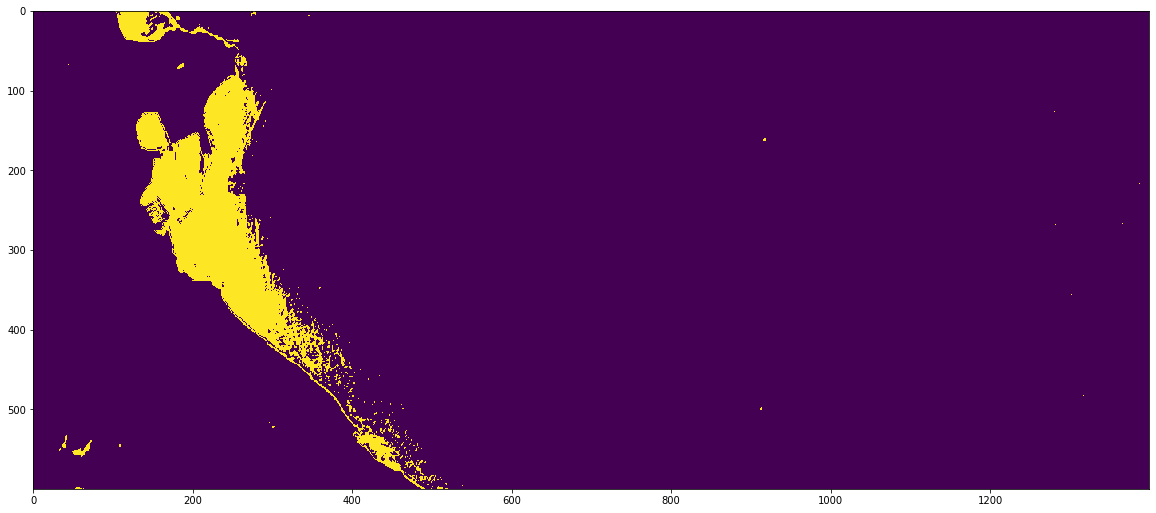

In [290]:
anomaly_without_ground = anomaly
anomaly_without_ground[img_labelsM1==1]= 0
plt.figure(figsize=(20,20))
plt.imshow(anomaly_without_ground)
plt.show()

In [ ]:
# need to compute the multivariate gaussian problem next 
# must have m(examples) >> n(features) otherwise sigma is non invertible

# Supposed to choose an non anomalous example, to extract mu and sigma ...
train_data = M1_ocean[0:200, 400:1200,:]
X_train = np.array([train_data[:,:,i].flatten() for i in range(train_data.shape[2])]).T
print(X_train.shape)
mu = np.nanmean(X_train, axis=0)

# technically works but kills the kernel .... X_train.shape = 160000*12...
sigma_mat = np.nanmean(np.dot(X_train-mu,(X_train-mu).T), axis=0)
# sigma_mat = np.cov(X_train)
print(f'Mean = {mu}, Standard Deviation = {sigma_mat}')

In [ ]:
def predict_anomaly_multivariate(X, mu, sigma, eps):
    # this method suggest the independance of each feature
    n = len(mu)
    X_mu = X-mu
    p_x = ((2*np.pi)**(-n/2))*(np.linalg.det(sigma)**(-0.5))*np.exp(-0.5*np.dot(np.dot(X_mu.T,np.pinv(sigma)),X_mu))
    return ( p_x < eps)